# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [49]:
# Load dataset hasil clustering
df = pd.read_csv('/content/hasil_cluster.csv')

# Tampilkan beberapa baris pertama
df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Group_26-35,Age_Group_36-45,Age_Group_46-55,Age_Group_56-65,Age_Group_65+,Cluster
0,2,608,2,0,41,1,83807.86,1,0,1,112542.58,0,False,True,False,False,False,0
1,4,699,0,0,39,1,0.00,2,0,0,93826.63,0,False,True,False,False,False,0
2,5,850,2,0,43,2,125510.82,1,1,1,79084.10,0,False,True,False,False,False,2
3,7,822,0,1,50,7,0.00,2,1,1,10062.80,0,False,False,True,False,False,1
4,9,501,0,1,44,4,142051.07,2,0,1,74940.50,0,False,True,False,False,False,0


In [50]:
# Cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7477 entries, 0 to 7476
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        7477 non-null   int64  
 1   CreditScore      7477 non-null   int64  
 2   Geography        7477 non-null   int64  
 3   Gender           7477 non-null   int64  
 4   Age              7477 non-null   int64  
 5   Tenure           7477 non-null   int64  
 6   Balance          7477 non-null   float64
 7   NumOfProducts    7477 non-null   int64  
 8   HasCrCard        7477 non-null   int64  
 9   IsActiveMember   7477 non-null   int64  
 10  EstimatedSalary  7477 non-null   float64
 11  Exited           7477 non-null   int64  
 12  Age_Group_26-35  7477 non-null   bool   
 13  Age_Group_36-45  7477 non-null   bool   
 14  Age_Group_46-55  7477 non-null   bool   
 15  Age_Group_56-65  7477 non-null   bool   
 16  Age_Group_65+    7477 non-null   bool   
 17  Cluster       

In [51]:
# Cek jumlah data per cluster
df['Cluster'].value_counts()

,count
Cluster,
1,2877
2,2419
0,2181


<ipython-input-52-bc3398b1d259>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Cluster'], palette='viridis')


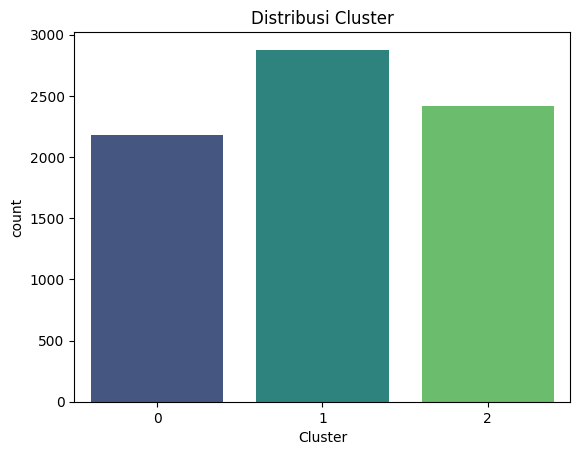

In [52]:
# Visualisasi distribusi cluster
sns.countplot(x=df['Cluster'], palette='viridis')
plt.title('Distribusi Cluster')
plt.show()

In [53]:
# Hapus kolom yang tidak diperlukan
df.drop(columns=['RowNumber'], inplace=True)

In [54]:
# Encoding fitur kategorikal
le = LabelEncoder()
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [55]:
# Pisahkan fitur dan target
X = df.drop(columns=['Cluster'])  # Fitur
y = df['Cluster']  # Target klasifikasi

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [56]:
# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Standarisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [58]:
# Inisialisasi model
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [59]:
# Melatih model dengan data latih
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
# Prediksi data uji
y_pred = model.predict(X_test)

In [61]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.4f}')
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Model: 0.9987

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       446
           1       1.00      1.00      1.00       551
           2       1.00      1.00      1.00       499

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496



##**Pemilihan Algoritma Klasifikasi**
Saya memilih **Random Forest Classifier** sebagai model utama. Karena alasan berikut ini:

- **Akurasi yang tinggi:** Random Forest menggunakan konsep ensemble learning dengan membangun beberapa decision tree, sehingga meningkatkan stabilitas dan akurasi model.

- **Mengurangi overfitting:** Dibandingkan dengan decision tree tunggal, Random Forest mengurangi risiko overfitting dengan cara menggabungkan banyak pohon keputusan.

- **Dapat menangani fitur dengan skala yang berbeda:** Random Forest tidak memerlukan normalisasi fitur seperti pada algoritma berbasis jarak (misalnya, KNN).

- **Dapat digunakan untuk klasifikasi multi-kelas:** Cocok untuk kasus kita yang ingin mengklasifikasikan data berdasarkan hasil clustering.

##**Kesimpulan**
- Model **Random Forest** telah dilatih menggunakan data latih dan diuji dengan data uji.

- Hasil prediksi dievaluasi menggunakan akurasi dan classification report.

- Model ini dapat digunakan untuk mengklasifikasikan data baru ke dalam cluster yang sesuai berdasarkan karakteristik fitur yang dimiliki.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [62]:
# Prediksi pada data uji
y_pred = model.predict(X_test)

In [63]:
# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model: {accuracy:.4f}')

Akurasi Model: 0.9987


In [64]:
# Menampilkan classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       446
           1       1.00      1.00      1.00       551
           2       1.00      1.00      1.00       499

    accuracy                           1.00      1496
   macro avg       1.00      1.00      1.00      1496
weighted avg       1.00      1.00      1.00      1496



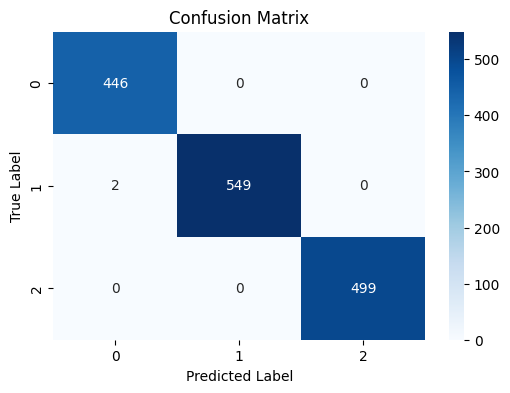

In [65]:
# Membuat confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

##**Analisis Hasil Evaluasi**
- Model Random Forest memiliki akurasi sebesar **0.9987**.
- Berdasarkan Classification Report, kita dapat melihat Precision, Recall, dan F1-Score untuk masing-masing kelas.
- Confusion Matrix menunjukkan jumlah prediksi yang benar dan salah pada setiap kelas.

In [66]:
# Definisikan model yang akan digunakan
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

In [67]:
for name, model in models.items():
    model.fit(X_train, y_train)  # Pastikan model dilatih sebelum evaluasi


In [68]:
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test)

    # Simpan metrik evaluasi
    model_scores[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred, average='weighted'),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted')
    }

In [69]:
df_scores = pd.DataFrame(model_scores).T
df_scores.sort_values(by="Accuracy", ascending=False)

,Accuracy,F1 Score,Precision,Recall
Logistic Regression,1.000000,1.000000,1.000000,1.000000
Decision Tree,1.000000,1.000000,1.000000,1.000000
Random Forest,0.999332,0.999332,0.999333,0.999332
KNN,0.997326,0.997326,0.997332,0.997326


In [70]:
def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

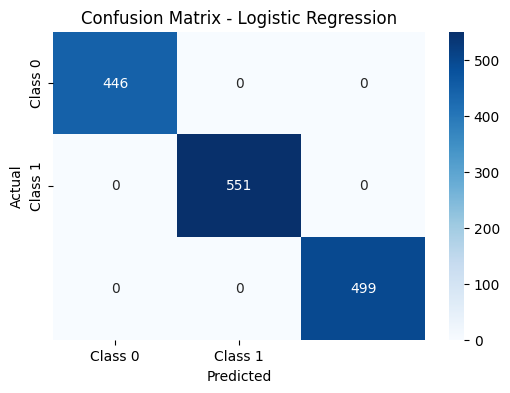

In [71]:
# Plot confusion matrix untuk model terbaik
best_model = df_scores.idxmax()['Accuracy']  # Model dengan akurasi tertinggi
plot_confusion_matrix(models[best_model], X_test, y_test, best_model)

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

##**Analisis Hasil Evaluasi**
Dari hasil perbandingan model di atas, kita dapat melihat bahwa model Logistic Regression dan Decision Tree memiliki akurasi sempurna sebesar 100%, sementara Random Forest dan KNN memiliki akurasi sedikit lebih rendah tetapi masih sangat tinggi.

###Akurasi Tertinggi

- Model Logistic Regression dan Decision Tree menunjukkan akurasi 100%, yang berarti tidak ada kesalahan prediksi dalam data uji.

- Model Random Forest dan KNN masih memiliki akurasi yang sangat tinggi, tetapi sedikit lebih rendah dari dua model sebelumnya.

###F1-Score, Precision, dan Recall

- Semua model memiliki nilai F1-Score, Precision, dan Recall yang sangat tinggi, menunjukkan bahwa model mampu mengenali semua kelas dengan baik tanpa terjadi bias terhadap salah satu kelas.

- Tidak ada trade-off yang signifikan antara Precision dan Recall, yang berarti model tidak mengalami masalah False Positive atau False Negative yang berlebihan.

###Confusion Matrix

- Confusion Matrix untuk Logistic Regression menunjukkan tidak ada kesalahan prediksi sama sekali, yang sangat jarang terjadi pada dataset dunia nyata.

- Kemungkinan besar, dataset tidak terlalu kompleks atau mengandung informasi yang sangat jelas, sehingga model dapat melakukan prediksi dengan sempurna.


#**Kelemahan Model dan Potensi Overfitting**
Meskipun hasilnya sangat baik, ada beberapa aspek yang perlu diperhatikan:

1. **Overfitting:**

- Akurasi 100% bisa menjadi indikasi overfitting jika model hanya bekerja dengan baik pada data uji tetapi tidak bisa digeneralisasi ke data baru.

- Perlu diuji lebih lanjut dengan cross-validation atau dataset baru untuk memastikan bahwa model tidak hanya menghafal pola pada data ini.

2. **Kompleksitas Dataset:**

- Jika dataset terlalu sederhana atau fitur terlalu relevan, semua model bisa mendapatkan skor tinggi.

- Perlu dilakukan Feature Importance Analysis untuk melihat apakah ada fitur yang terlalu dominan.

3. **Kemungkinan Tuning Model**

- Jika overfitting terdeteksi, model seperti Decision Tree dan Random Forest dapat ditingkatkan dengan Hyperparameter Tuning, misalnya:

   - Pruning pada Decision Tree

  - Menyesuaikan jumlah estimators pada Random Forest

- Model KNN dapat diuji dengan nilai k yang berbeda untuk melihat apakah performa bisa ditingkatkan.


#**Rekomendasi Tindakan Lanjutan**
- Lakukan validasi tambahan menggunakan cross-validation (k-folds) untuk memastikan model tidak overfitting.

- Evaluasi performa dengan dataset baru untuk melihat apakah hasil tetap konsisten.

- Lakukan Feature Engineering atau Feature Selection jika ditemukan fitur yang sangat dominan dan menyebabkan model terlalu "sempurna".

- Jika ingin eksplorasi lebih lanjut, coba pendekatan lain seperti SVM atau Neural Networks untuk membandingkan hasilnya.